# Solving the Captcha problem with Random Forest and Suppor Vector

To be able to run this notebook you should have place in the folder Peter's program __image_loader.py__ and the folder __images__ used last week

In [8]:
import numpy as np
import os
from skimage.transform import resize
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import image_loader as im
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
path=os.getcwd()+'/' # finds the path of the folder in which the notebook is
path_train=path+'images/train/'
path_test=path+'images/test/'
path_real=path+'images/real_world/'

We define the function __prep_datas__ (props to Alexandre), already used the previous week. However now we reshape the images from a 32x32 matrix (this value seems unnecessary, however the bigger the image the worst the classifiers will work) to a flat 1024 vector, a constraint given by the Random Forest classifier.

In [5]:
def prep_datas(xset,xlabels):
    X=list(xset)
    for i in range(len(X)):
        X[i]=resize(X[i],(32,32,1)) # reduce the size of the image from 100X100 to 32X32. Also flattens the color levels
        X[i]=np.reshape(X[i],1024) # reshape from 32x32 to a flat 1024 vector
    X=np.array(X) # transforms it into an array
    Y=np.asarray(xlabels) # transforms from list to array
    return X,Y

Then we load the training and the test set:

In [6]:
training_set, training_labels = im.load_images(path_train)
X_train, Y_train = prep_datas(training_set,training_labels)

test_set, test_labels = im.load_images(path_test)
X_test,Y_test=prep_datas(test_set,test_labels)

We define the classifiers Random Forest Classifier and Support Machine Classifier and we train them throught the fit function. Taking a linear kernel for SVC gives the best results for this classifier.

In [14]:
classifierForest = RandomForestClassifier(n_estimators=1000)
classifierSVC=svm.SVC(kernel='linear')

classifierForest.fit(X_train, Y_train) 
classifierSVC.fit(X_train,Y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's test how good the system is doing

In [10]:
expectedF = Y_test
predictedF = classifierForest.predict(X_test)
predictedS = classifierSVC.predict(X_test)

print(expectedF)
print(predictedF)
print(predictedS)

[0 0 0 0 1 0]
[0 0 0 0 1 0]
[0 0 0 0 1 0]


Now we load the real set of images and test it. This part of the program has been taken from [Alexandre's program](https://github.com/peterwittek/qml-rg/blob/master/Meeting%205/aps_capcha.ipynb) from last week. First we load the 'real world' images

In [15]:
real_world_set=[]
for i in np.arange(1,73):
    filename=path+'images/real_world/'+str(i)+'.png'
    real_world_set.append(im.deshear(filename))
fake_label=np.ones(len(real_world_set),dtype='int32')
X_real,Y_real=prep_datas(real_world_set,fake_label)

Then we make the predictions with both classifiers

In [16]:
y_predF = classifierForest.predict(X_real)
y_predS = classifierSVC.predict(X_real)

Finally we plot the results

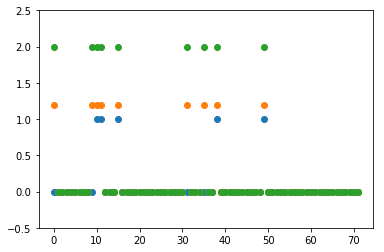

In [17]:
f=open(path+'images/real_world/labels.txt',"r")
lines=f.readlines()
result=[]
for x in lines:
    result.append((x.split('	')[1]).replace('\n',''))
f.close()

result=np.array([int(x) for x in result])
result[result>1]=1
plt.plot(y_predF,'o')
plt.plot(1.2*y_predS,'o')
plt.plot(2*result,'o')
plt.ylim(-0.5,2.5);

As we can see, __SVC__ (orange dots) seems much more efficient than __Random Forest__ (blue dots). Different paremeters for the classifiers may improve the efficiency of RandomForest eventough differents sets were tried and all seemed to have errors. Data augmentation should also help to solve the problem.